In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
path = '/content/drive/MyDrive/통계분석/data/Boston.csv'

In [3]:
raw = pd.read_csv(path)
raw.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
df = raw.copy()

In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
#독립변수, 종속변수 (지도학습 : 가격(y) 존재하기때문)

y = df['medv']
x = df.iloc[:, :-1] # df.drop(column='medv') / df.drop(['medv'], axis=1)

In [10]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
#훈련용/ 테스트 데이터 분리

x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size= 0.3, random_state= 42)

In [12]:
#모델링 (선형회귀 분석)

lr = LinearRegression()


In [13]:
#모델 훈련 (반드시, 훈련용 데이터로 >> 모델구축)
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
#모델 성능  평가 (테스트 데이터로 예측 수행)
#예측 결과 y_pred 구하기

y_pred = lr.predict(x_test)

In [15]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [16]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64

In [17]:
#회귀분석 평가 지표 (mse, rmse, mae, r^2(결정계수 r2_score))

mse = mean_squared_error(y_test, y_pred) # y_test : 실 데이터, y_pred : 예측 데이터 의 오차
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE : %0.2f' %mse) #평균제곱오차
print('RMSE : %0.2f' %rmse) #평균제곱근오차
print('MAE : %0.2f' %mae) #평균절대오차




MSE : 21.52
RMSE : 4.64
MAE : 3.16


In [18]:
r2 = round(r2_score(y_test, y_pred),2) #결정계수
print('r2(결정계수) : %0.2f' %r2) # 결정계수(설명력)


r2(결정계수) : 0.71


In [19]:
print('y절편 : ', round(lr.intercept_,2))
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

y절편 :  31.63
회귀 계수 값 :  [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]


In [20]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [21]:
# y_pred(가격) = -1.300e-01 * crim + 4.000e-02 * zn + .... + 31.63

In [22]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns) #회귀계수
coef.sort_values(ascending=False) # 내림차순

rm          4.06
chas        3.12
rad         0.24
indus       0.05
zn          0.04
b           0.01
age        -0.01
tax        -0.01
crim       -0.13
lstat      -0.55
ptratio    -0.91
dis        -1.39
nox       -15.42
dtype: float64

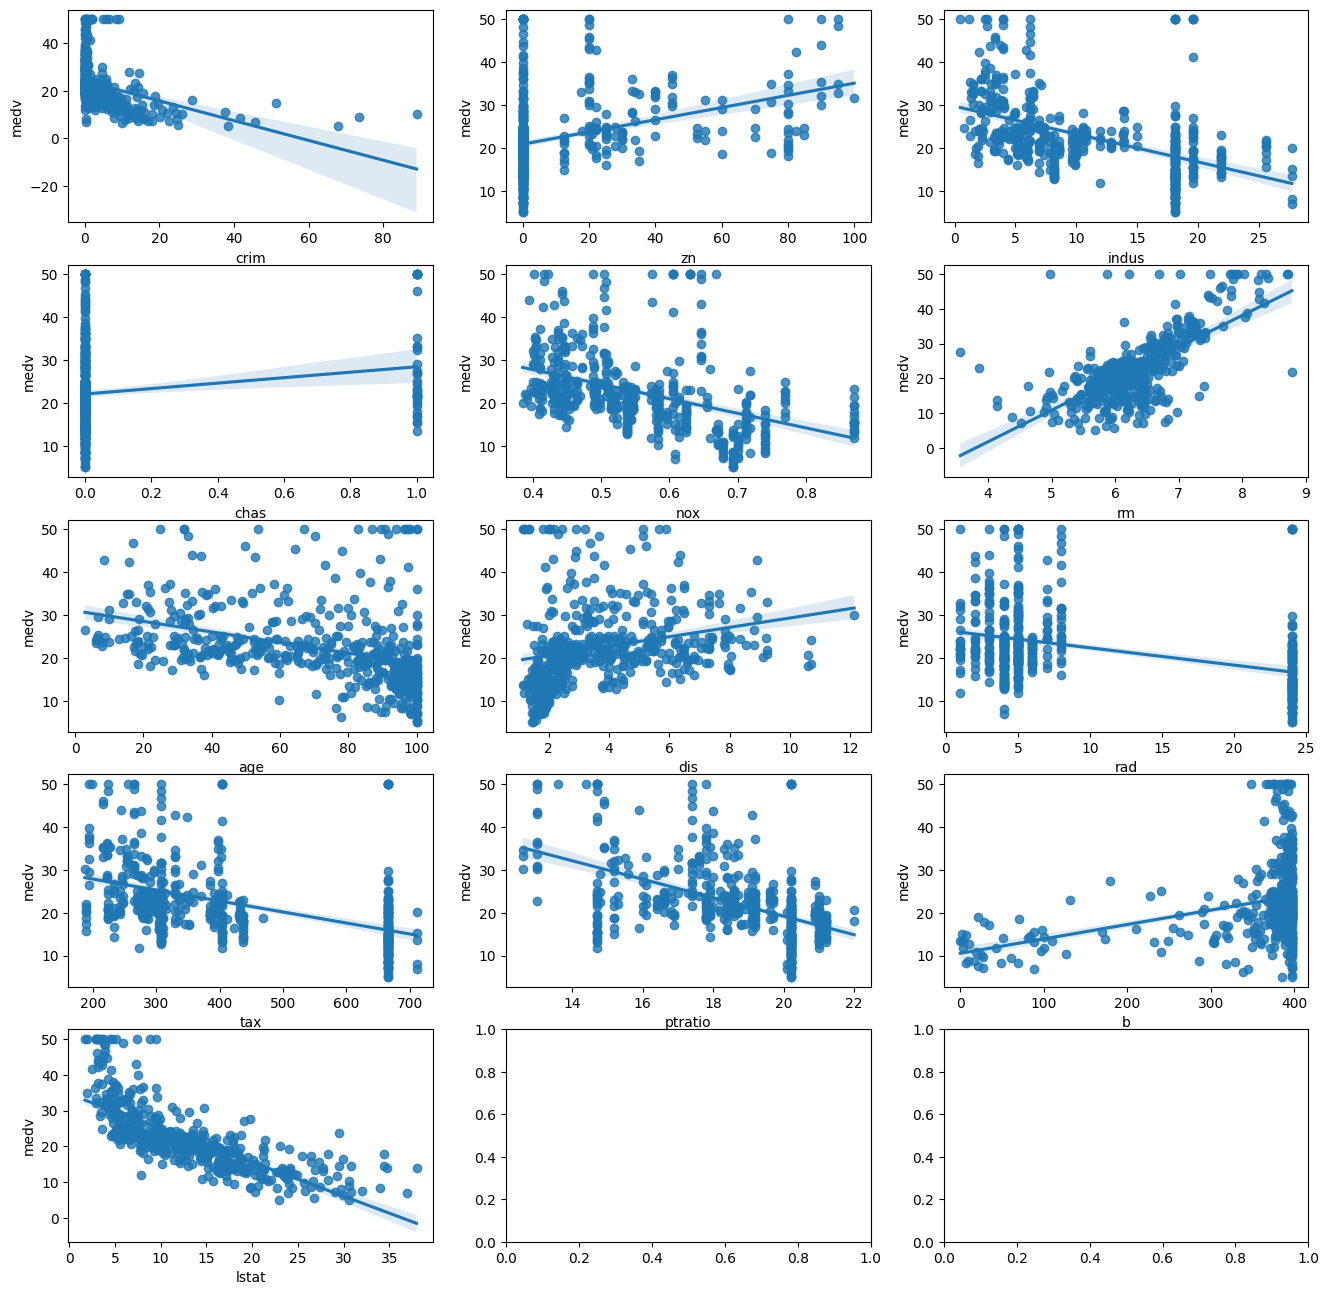

In [23]:
#데이터 시각화
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 16), ncols= 3, nrows= 5)

x_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='medv', data=df, ax=axs[row][col])


auto-mpg 데이터 분석

In [24]:
path = '/content/drive/MyDrive/통계분석/data/auto-mpg.data.csv'

In [27]:
auto = pd.read_csv(path)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
raw = auto.copy()
raw.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [29]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [31]:
auto.drop(['car_name','origin','horsepower'], axis= 1, inplace=True)

In [32]:
auto.shape

(398, 6)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
#독립변수 (x), 종속변수(y) 구분

y = auto['mpg'] #연비
x = auto.drop(['mpg'], axis=1)

In [35]:
x

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [36]:
#훈련용 데이터 / 평가용 데이터 분할

train_x, test_x, train_y, test_y = \
train_test_split(x,y, test_size=0.3, random_state=42)

모델링 선형회귀분석

In [37]:
#모델 생성
lr = LinearRegression()

#모델 훈련
lr.fit(train_x, train_y)

#예측
y_pred = lr.predict(test_x) # text_x 데이터프레임 형태

,cylinders,displacement,weight,acceleration,model_year
198,4,91.0,1795,17.4,76
396,4,120.0,2625,18.6,82
33,6,232.0,2634,13.0,71
208,8,318.0,3940,13.2,76
93,8,318.0,4237,14.5,73
...,...,...,...,...,...
60,4,140.0,2408,19.5,72
79,4,96.0,2189,18.0,72
284,6,225.0,3360,16.6,79
304,4,91.0,2130,14.7,79


In [41]:
test_y

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [38]:
y_pred

array([31.52848751, 30.78891693, 21.49371422, 16.95818177, 12.74346605,
       26.27542683, 28.95160986,  8.57404465, 17.70905303, 22.76276182,
       12.06270523, 34.98678288, 26.75925599, 14.13190304, 24.77686404,
        5.90211418, 30.98096323, 24.14563349, 15.32246178, 35.14651783,
       23.57425408, 19.77317246, 29.00746195, 30.34318909, 15.02902547,
       34.58776778, 25.91010457, 25.7238098 , 21.9802649 ,  7.78561225,
       29.38187731, 34.83529534, 19.72937968, 24.95317633, 33.18325769,
       11.66203721, 24.62355093, 21.9712633 , 12.62192264, 27.07517458,
       27.70206864, 27.40545058, 20.56129032,  7.63958438, 23.35334483,
       33.52020372, 26.61655631, 24.56978886, 22.93507616, 27.88326319,
       23.42668416, 32.59073851, 31.34539081, 10.15335707, 29.09848666,
        9.01439141, 19.08865732, 28.34075589, 24.10748781, 20.80566575,
       16.0507234 , 30.74500303, 24.93471638, 20.63643734, 21.7194628 ,
       24.37761768, 25.88257121, 33.72470041, 29.43020136, 12.88

In [47]:
#모델 평가
#mse, mae, rmse

mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_y, y_pred)

print('MSE : %0.2f'  %mse)
print('RMSE : %0.2f' %rmse)
print('MAE : %0.2f' %mae)

MSE : 9.93
RMSE : 3.15
MAE : 2.56


In [48]:
print('y절편 : ', np.round(lr.intercept_ ),2)
print('회귀 계수 값 : ', np.round(lr.coef_, 2))

y절편 :  -19.0 2
회귀 계수 값 :  [ 0.24 -0.01 -0.01  0.07  0.79]


In [49]:
pd.Series(data=np.round(lr.coef_, 2), index=x.columns)

cylinders       0.24
displacement   -0.01
weight         -0.01
acceleration    0.07
model_year      0.79
dtype: float64

In [50]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)


model_year      0.79
cylinders       0.24
acceleration    0.07
displacement   -0.01
weight         -0.01
dtype: float64

In [ ]:
#회귀식
#y_pred = y절편 + 0.79*(model_year) + 0.79*(model_year) + ....

In [55]:
coef.sort_values(ascending=False).to_frame(name='coef')


,coef
model_year,0.79
cylinders,0.24
acceleration,0.07
displacement,-0.01
weight,-0.01


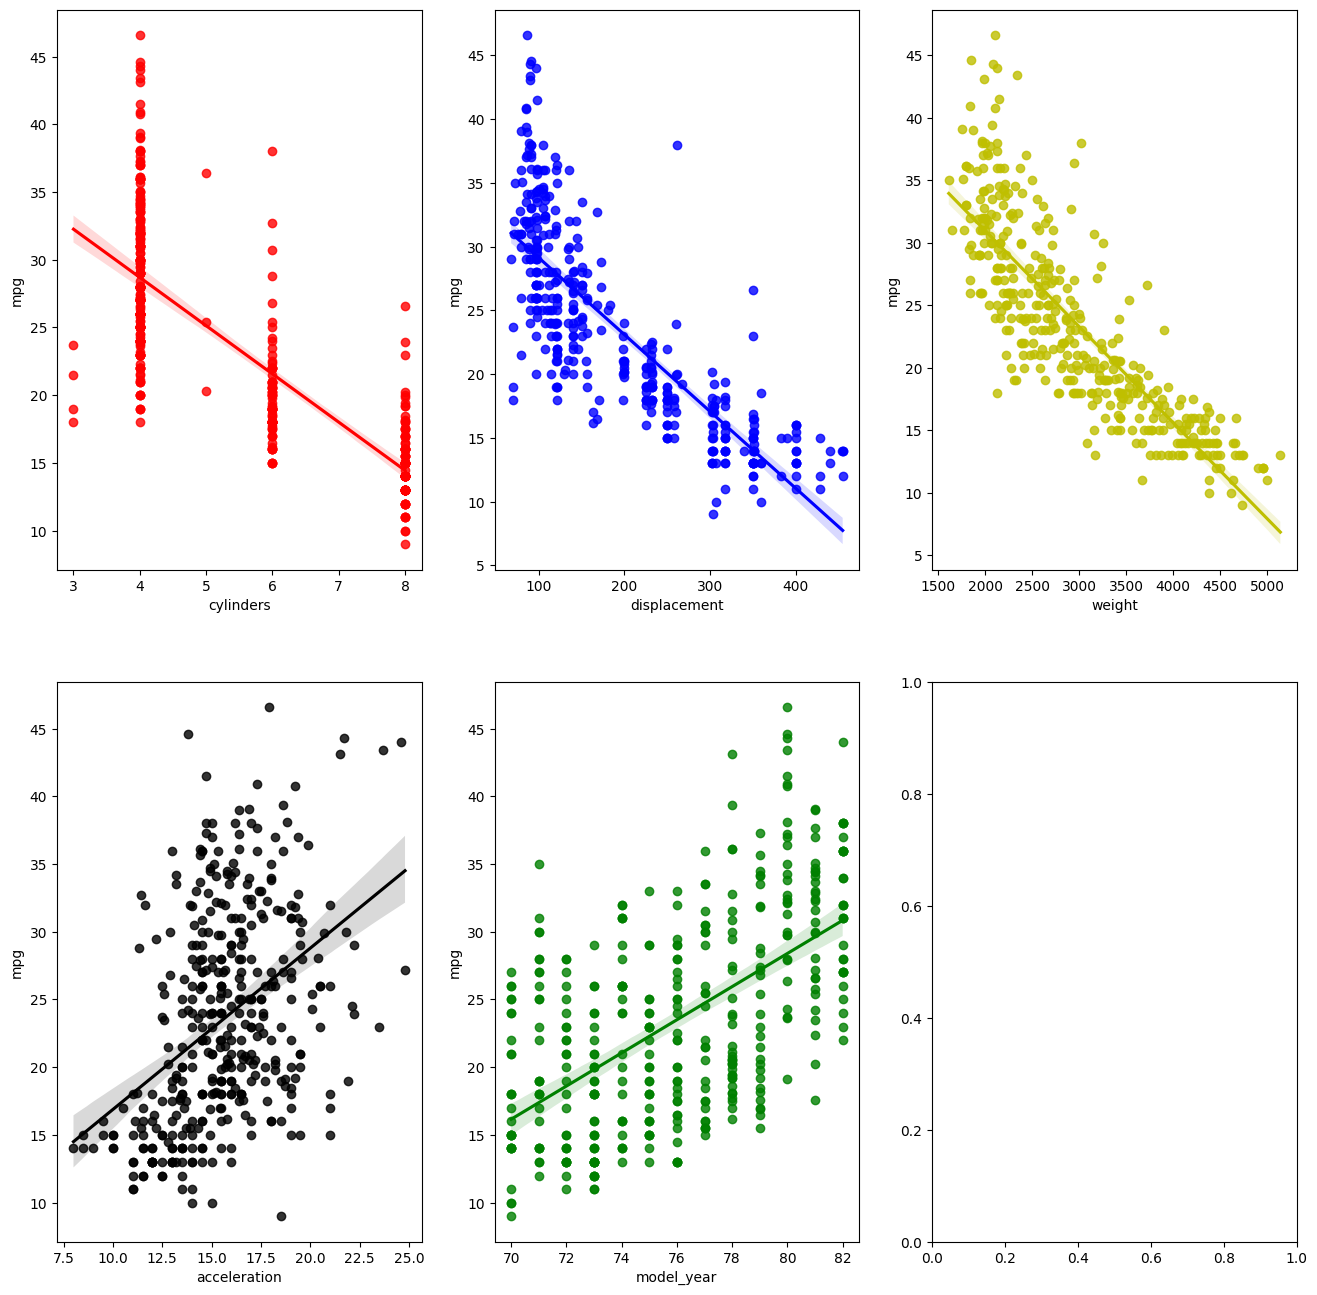

In [57]:
#데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)

x_features = ['cylinders', 'displacement', 'weight', 'acceleration',
       'model_year']
plot_color = ['r','b','y','k','g']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=auto, ax = axs[row][col], color = plot_color[i])


자동차 연비 예측 프로그램

In [66]:
print('연비를 예측하고 싶은 차의 정보를 입력해 주세요.')

def pred_car_mpg():

    cylinders = int(input('cylinders :'))
    displacement = int(input('displacement :'))
    weight = int(input('weight :'))
    acceleration = int(input('acceleration :'))
    model_year = int(input('model_year :'))

    car_info =  {
        'cylinders' : cylinders,
        'displacement' : displacement,
        'weight' : weight,
        'acceleration' : acceleration,
        'model_year' : model_year
    }
    car_auto = pd.DataFrame([car_info])


    predicted_mpg = lr.predict(car_auto)
    print('예측 연비 : ', predicted_mpg)

pred_car_mpg()




연비를 예측하고 싶은 차의 정보를 입력해 주세요.
cylinders :7
displacement :300
weight :3200
acceleration :22
model_year :90
예측 연비 :  [33.36642819]
